In [1]:
from google.colab import files
files.upload()  # Upload the kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d primaryobjects/voicegender
!unzip voicegender.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/primaryobjects/voicegender
License(s): CC-BY-NC-SA-4.0
100% 405k/405k [00:00<00:00, 1.04MB/s]
100% 405k/405k [00:00<00:00, 1.04MB/s]
Archive:  voicegender.zip
  inflating: voice.csv               


In [2]:
#import all the necessary libraries and tools needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.activations import tanh
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("voice.csv")

In [6]:
#just check if dataset is displaying or not
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [7]:
#we will drop the male female label columns as we want to predict them instead of the model just learning there values
X = data.drop('label', axis=1)
y = data['label']

In [8]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [10]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [11]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [13]:
#split dataset into train and test its a 80 20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [17]:
model = Sequential([
    Conv1D(32, 3, activation=tanh, input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(64, 3, activation=tanh),
    MaxPooling1D(2),
    Conv1D(128, 3, activation=tanh),
    Flatten(),
    Dense(512, activation=tanh),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [18]:
model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
80/80 [==============================] - 2s 9ms/step - loss: 0.2541 - accuracy: 0.8903 - val_loss: 0.1005 - val_accuracy: 0.9732
Epoch 2/50
80/80 [==============================] - 1s 7ms/step - loss: 0.1033 - accuracy: 0.9676 - val_loss: 0.0941 - val_accuracy: 0.9732
Epoch 3/50
80/80 [==============================] - 1s 7ms/step - loss: 0.0826 - accuracy: 0.9755 - val_loss: 0.0915 - val_accuracy: 0.9700
Epoch 4/50
80/80 [==============================] - 1s 7ms/step - loss: 0.0757 - accuracy: 0.9759 - val_loss: 0.0983 - val_accuracy: 0.9685
Epoch 5/50
80/80 [==============================] - 1s 6ms/step - loss: 0.0719 - accuracy: 0.9763 - val_loss: 0.0825 - val_accuracy: 0.9732
Epoch 6/50
80/80 [==============================] - 1s 7ms/step - loss: 0.0669 - accuracy: 0.9791 - val_loss: 0.0806 - val_accuracy: 0.9700
Epoch 7/50
80/80 [==============================] - 1s 10ms/step - loss: 0.0608 - accuracy: 0.9830 - val_loss: 0.0731 - val_accuracy: 0.9748
Epoch 8/50
80/80 [=

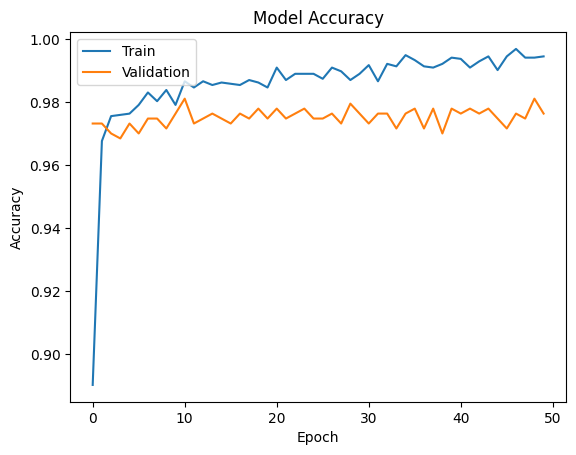

In [20]:
# Plot training history
#model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

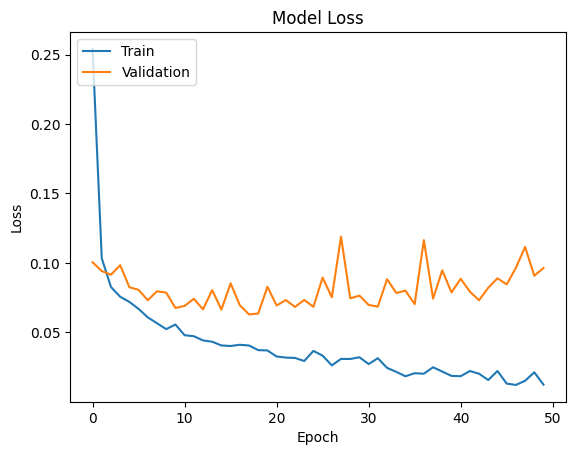

In [21]:
#model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

2/2 [==============================] - 0s 8ms/step


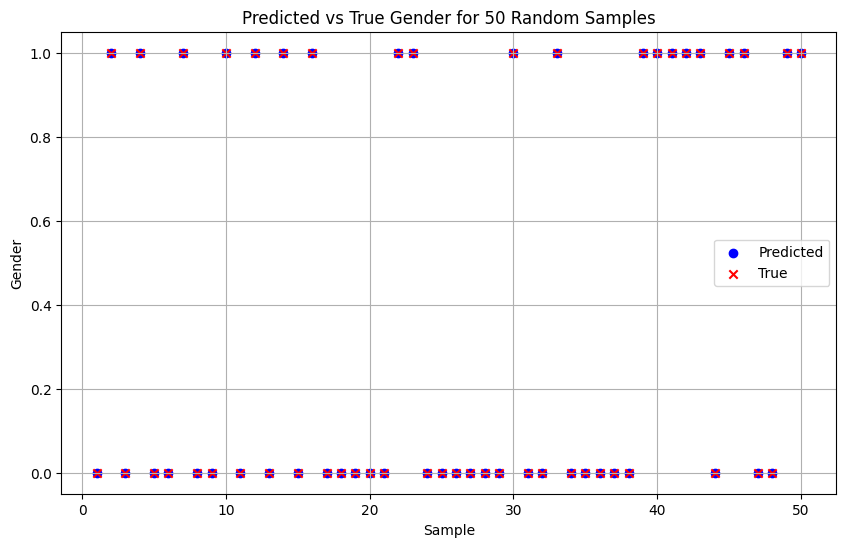

In [28]:

#lets select 50 random samples from the given dataset to see if our model is performing correctly or not
random_indices = np.random.choice(len(X), size=50, replace=False)
X_samples = X[random_indices]
y_true = y[random_indices]

#do some reshaping
X_samples_reshaped = X_samples.reshape(X_samples.shape[0], X_samples.shape[1], 1)

# Make predictions
predictions_proba = model.predict(X_samples_reshaped)
predictions = (predictions_proba > 0.5).astype('int').flatten()

# change numerical labels to original labels again
predicted_labels = label_encoder.inverse_transform(predictions)
true_labels = label_encoder.inverse_transform(y_true)

results_df = pd.DataFrame({
    'Sample': range(1, 51),
    'Predicted': predicted_labels,
    'True': true_labels
})

# use matplotlib to plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Sample'], results_df['Predicted'], color='blue', label='Predicted')
plt.scatter(results_df['Sample'], results_df['True'], color='red', marker='x', label='True')
plt.xlabel('Sample')
plt.ylabel('Gender')
plt.title('Predicted vs True Gender for 50 Random Samples')
plt.legend()
plt.grid(True)
plt.show()
